### 다층 퍼셉트론을 위한 클래스 설계

#### abalone 예제

In [6]:
%pwd

'C:\\Users\\gowra\\1_멋쟁이 사자처럼\\2. 신경망 기법\\신경망(클래스_프로그램_제작_프로젝트)'

In [12]:
import os

os.chdir('C:\\Users\\gowra\\1_멋쟁이 사자처럼\\2. 신경망 기법\\신경망(클래스_프로그램_제작_프로젝트)/code/')

In [13]:
%pwd

'C:\\Users\\gowra\\1_멋쟁이 사자처럼\\2. 신경망 기법\\신경망(클래스_프로그램_제작_프로젝트)\\code'

In [15]:
%run mlp_model.ipynb
%run dataset_chap123.ipynb
%run dataset_flowers.ipynb

In [16]:
ad = AbaloneDataset()  # abalone_dataset
am = MlpModel('abalone_model', ad, [10, 5, 3])  # abalone_model
am.exec_all(epoch_count=1000, report=200, batch_size=100, learning_rate=0.003)

Model abalone_model train started:
    Epoch 200: cost=4.618, accuracy=0.785/0.789 (2/2 secs)
    Epoch 400: cost=4.469, accuracy=0.789/0.782 (2/4 secs)
    Epoch 600: cost=4.461, accuracy=0.788/0.774 (1/5 secs)
    Epoch 800: cost=4.383, accuracy=0.791/0.789 (2/7 secs)
    Epoch 1000: cost=4.317, accuracy=0.793/0.788 (2/9 secs)
Model abalone_model train ended in 9 secs:
Model abalone_model test report: accuracy = 0.796, (0 secs)

Model abalone_model Visualization
[1.00,0.00,0.00,0.37,0.29,0.10,0.25,0.10,0.05,0.09] => 추정  7.5 : 정답 10.0
[0.00,0.00,1.00,0.47,0.35,0.12,0.42,0.16,0.09,0.13] => 추정 10.4 : 정답  9.0
[0.00,1.00,0.00,0.69,0.55,0.20,1.79,0.81,0.42,0.46] => 추정 11.4 : 정답  9.0


    abalone dataset과 회귀 분석 출력을 수행하게 될 AbaloneDataset()를 클래스 객체 ad로 만들어 준다.
  
    MlpModel() 을 통해 어떠한 모델인지, 어떠한 데이터셋을 활용하는지, 은닉 계층의 수와 폭은 어떻게 되는지 값을 넘겨주고 am으로 만들어 준다.
    
    am 클래스 객체의 실행함수인 exec_all() 에 경험적 근거에 의한 하이퍼파라미터값을 넣어 학습 및 검증 그리고 테스트를 수행시켜 준다.

In [ ]:
am.visualize(5)
print(am)

    am 클래스 객체에 visualize() 를 단독으로 활용하여 검증데이터에 대한 결괏값을 출력

#### 구축도

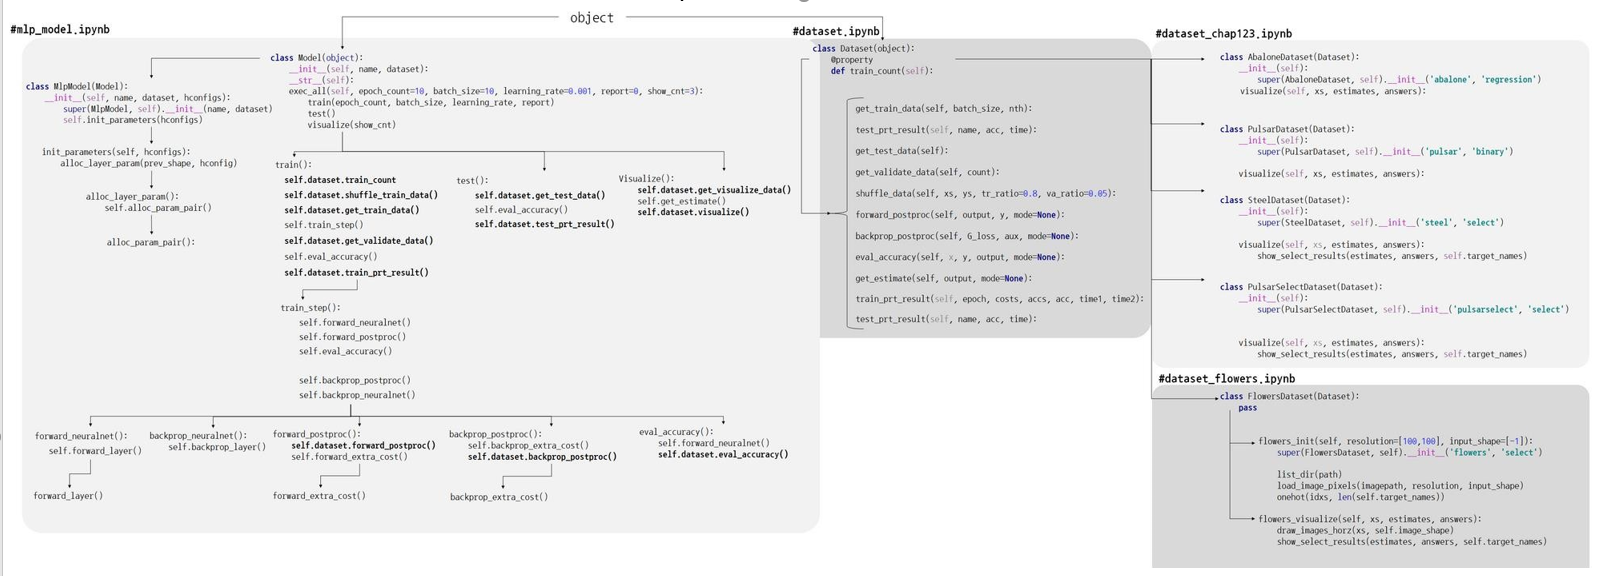

In [7]:
from IPython.display import Image 
Image("class1.png")

In [ ]:
## mlp_model.ipynb

%run …/mathutil.ipynb  #이 코드는 이후 구축 예정(기타 연산기능)
np.random.seed(126)

    신경망 연산이 진행되기에 각각의 활성화 함수와 활성화 함수의 역전파, 그리고 기타 기능이 저장되어 있는 mathutil.ipynb  파일을 매직 커맨드를 통해 실행해줍니다

#### Model Class

    Model() 클래스는 초기화, 문자열화, 전체 과정 수행 이렇게 기본적인 세 가지 메서드만을 정의
    
    초기화 함수에서는 기본적으로 모델 이름과 데이터셋을 같은 이름의 객체 변수에 저장하며, 파라미터 초기화에 이용되는 rand_std 값을 지정
    hasattr()를 통해 rand_std값이 지정되어있지 않다면 0.030으로 값을 초기화 시켜 주는 함수입니다
    

##### mlp_model.ipynb


In [ ]:
class Model(object):
    def init (self, name, dataset):
        self.name = name  
        self.dataset = dataset
        if not hasattr(self, 'rand_std'):  # rand_std값이 지정되어있지 않다면 0.030으로 값을 초기화
            self.rand_std = 0.03


##### example.ipynb


In [ ]:
class hasattr_test(object):  
    def init (self):
        #self.rand_std = rand_std
        if not hasattr(self, 'rand_std'): self.rand_std = 0.03


In [ ]:
class hasattr_test(object):
    def init (self,rand_std):  
        self.rand_std = rand_std
        if not hasattr(self, 'rand_std'): self.rand_std = 0.03  

    클래스의 초기화 메서드에 'rand_std' 매개 변수가 존재하지 않는다면 클래스 객체 x의 rand_std값은 0.03으로 저장되게 됩니다.  
    반대로 주석을 제거하여 rand_std 값이 존재하게 된다면 그 값은 그대로 유지됩니다.


##### mlp_model.ipynb


In [ ]:
def __str__(self):
    return '{}/{}'.format(self.name, self.dataset)

    문자열화 메서드 __str__(self): 의 경우 클래스 객체를 출력할 때 출력 문자열 생성 방법을 정의하게 됩니다. 
    이 과정에서 모델의 이름과 데이터셋을 표기하도록 설정하였습니다. 



##### mlp_model_test.ipynb

In [ ]:
def exec_all(self,
             epoch_count=10,
             batch_size=10,
             learning_rate=0.001,
             report=0,
             show_cnt=3): # show_cnt : visualize 할 때, 몇개의 검증 데이터를 보여줄거니? 
    
    self.train(epoch_count, batch_size, learning_rate, report)
    self.test()
    if show_cnt > 0: self.visualize(show_cnt)

    exec_all() 의 경우 다수의 설정값을 매개 변수값으로 전달받습니다. 
    이 값들은 train() 와 test(), visualize() 에게 차례로 전달되며 동작을 수행하게 됩니다. 
    visualize()의 경우 show_cnt 값이 0을 초과한 경우에만 동작하게 되며, 이는 검증 데이터를 활용한 테스트 결과를 몇 번이나 출력할지 결정하게 된다.


##### mlp_model.ipynb

In [ ]:
class MlpModel(Model):
    def init(self, name, dataset, hconfigs):
        super(MlpModel, self).__init__(name, dataset)
        self.init_parameters(hconfigs)

    다층 퍼셉트론 신경망을 지원하는 MlpModel() 클래스를 선언하는 과정
    나머지 메서드들을 클래스 외부에서 따로 함수를  정의하여 등록하는 방식

    Model() 클래스를 상속받으며 초기화 메서드를 통해 name, dataset, hconfigs 를 전달받습니다. 
    hconfigs 의 경우 init_parameters() 에 전달되며, 이 값은 이전과 마찬가지로 은닉 계층의 수와 폭을 리스트 형태로 설정하게 됩니다. 
    그리고 init_parameters()는 바로 이어 mlp_init_parameters()로 정의하고, MlpModel() 클래스에 정의

In [ ]:
def mlp_init_parameters(self, hconfigs):
    self.hconfigs = hconfigs
    self.pm_hiddens = []
    prev_shape = self.dataset.input_shape # dataset class에서 독립변수의 행의 크기

    for hconfig in hconfigs:
        pm_hidden, prev_shape = self.alloc_layer_param(prev_shape, hconfig)
        self.pm_hiddens.append(pm_hidden)

    output_cnt = int(np.prod(self.dataset.output_shape))
    self.pm_output, _ = self.alloc_layer_param(prev_shape, output_cnt)

    hconfigs를 상위 MlpModel() 클래스에서 전달받게 됩니다. 그리고 이 값을 활용하여 pm_hiddens를 정의할 예정

    prev_shape 의 경우 데이터와 관련있기에 Dataset 클래스에서 전달받게 됩니다. 
    input_shape = xs[0].shape 으로 데이터의 독립변수만을 모아둔 xs 에 접근하여 첫 번째 행의 크기를 받아와 input_shape 로 저장하게 됩니다

    hconfigs 에 누적 저장된 은닉 계층들이 차례로 for 반복문을 통해 hconfig 로 설정값이 전달되어 집니다.
    그래서 처음으로 수행되는 alloc_layer_param() 의 return 값에는 첫 번째, 은닉 계층의 가중치와 편향을 pm_hidden 변수에 dict 타입으로 전달받습니다. 

    pm_hidden은 pm_hiddens로 append()함수를 통해 누적 저장됩니다
    
    Dataset() 클래스의 output_shape을 불러와 np.prod()와 int() 통과시켜 정수값으로 전환시켜 줍니다. 
    이는 앞으로 확장 과정에서 입출력 벡터 크기나 은닉 벡터 크기가 자연수가 아닌 다차원 크기를 나타내는 리스트나 튜플 등의 형태로도 표현될 것이기 때문입니다.
    예를 들어 output_cnt 를 정의하기 위해서는 output_shape인 tuple형식의 (1, )을 예로 들면, 이 값을 np.prod()를 통해 위 아래 방향으로 배열 원소 간 곱하여 1로 만들어 줍니다. 그리고 이 값을 int()로 완벽하게 정수 전환을 시켜 줍니다.
    마지막으로 이렇게 정의된 output_cnt는 은닉 계층의 마지막 정보로 갱신된 prev_shape을 전달 받아 마지막 계층의 파라미터 pm.output을 출력시켜줍니다.

In [ ]:
def mlp_alloc_layer_param(self, input_shape, hconfig):
    input_cnt = np.prod(input_shape)
    output_cnt = hconfig
    weight, bias = self.alloc_param_pair([input_cnt, output_cnt])

    return {'w': weight, 'b': bias}, output_cnt

    mlp_alloc_layer_param() 의 정의 과정에서 입력값을 보면 은닉 계층의 정보 hconfig가 output_cnt 로 갱신됩니다. 
    이러한 output_cnt는  변수명이 prev_shape으로 전환되며 다시 self.alloc_layer_param()의 prev_shape 으로 할당되어 집니다. 
    그리고 두 번째 hconfig 값인 5가 들어오며 은닉 계층의 정보만큼 반복적으로 수행되어 집니다

In [ ]:
def mlp_alloc_param_pair(self, shape):
    weight = np.random.normal(0, self.rand_std, shape)
    bias = np.zeros([shape[-1]])
    return weight, bias

    mlp_alloc_layer_param() 를 살펴보면 여기서도 마찬가지로 전달받은 input_shape을 np.prod()에 통과시켜 input_cnt로 저장합니다

    mlp_alloc_param_pair() 또한 numpy의 함수들을 활용하여 가중치와 편향값을 초기화 하는 과정

    외부에서 정의된 각각의 함수들은 전부 MlpModel() 클래스의 메서드로 등록되며, 내부에서 정의한 것과 같은 역할을 수행하게 됩니다.  
    그리고 이러한 외부 메서드 등록은 외부에서 정의한 하나의 함수를 클래스의 여러 메서드로 중복 등록할 수 있어서 코드의 중복을 줄일 수 도 있습니다

In [ ]:
def mlp_model_train(self,
                    epoch_count=10,
                    batch_size=10,
                    learning_rate=0.001,
                    report=0):

    self.learning_rate = learning_rate

    batch_count = int(self.dataset.train_count / batch_size)
    time1 = time2 = int(time.time())  # 에폭에 따른 시간 결과

    if report != 0:
        print('Model {} train started:'.format(self.name))  # 모델의 학습 시작을 알린

    for epoch in range(epoch_count):
        costs = []
        accs = []
        self.dataset.shuffle_train_data(batch_size * batch_count)  # 무작위 데이터 생성

        for n in range(batch_count):
            trX, trY = self.dataset.get_train_data(batch_size, n)  # 학습데이터를 뽑아낸다,(배치사이즈 만큼)
            cost, acc = self.train_step(trX, trY)  # 한번의 학습이 됐을 때,
            costs.append(cost)
            accs.append(acc)

        if report > 0 and (epoch + 1) % report == 0:
            vaX, vaY = self.dataset.get_validate_data(100)  # 검증 데이터를 얻는다.
            acc = self.eval_accuracy(vaX, vaY)
            time3 = int(time.time())
            tm1, tm2 = time3 - time2, time3 - time1  # 아직 같은 같은 값을 갖는다 (갱신 x)
            self.dataset.train_prt_result(epoch + 1, costs, accs, acc, tm1, tm2) # 위 정보를 받아 출력을 제어
            time2 = time3  # 에폭당 누적 학습이 얼마나 걸리는지 확인하기 위해 time2를 최근 학습된 시간으로 갱신.

    # 위와 같은 결과지만 현재 시간과 초기 시간의 편차를 구해 전체 학습시간을 구한다.
    tm_total = int(time.time()) - time1
    print('Model {} train ended in {} secs:'.format(self.name, tm_total))  # 모댈 헉습이 끝났음을 알려줌

MlpModel.train = mlp_model_train  # MlpModel 클래스의 train에 할당 

    미니배치로 나누는 단계
    학습 데이터의 수와 배치의 크기를 활용하여 총 몇 개의 미니배치로 나눌 것 인 지 값을 설정합니다
    매개 변수인 epoch_count 의 범위만큼 for 반복문을 통해 학습을 수행

    한 번의 에폭이 수행될 때마다 무작위로 섞인 데이터를 활용하고자 Dataset클래스의 shuffle_train_data(batch_size*batch_count) 를 활용하고, 
    위에서 구할 batch_count 을 통해 학습 데이터의 독립 변수와 종속 변수를 trX, trY 로 분리하여 줍니다.

    분리된 변수를 Dataset 클래스의 train_step() 메서드에 통과시켜 cost 와 acc 를 산출시켜주도록 하겠습니다

    한 차례 에폭이 종료가 되었을 때, if 조건문 을 통해 report 값의 주기만큼 검증 데이터를 얻어 vaX, vaY 로 값을 저장하며, 
    이 변수들을 eval_accuracy() 에 통과시켜 정확도 acc 를 얻어냅니다

    time() 를 활용하여 첫 에폭이 시작되기 직전에 한번 측정, report 주기별로 에폭이 종료되었을 때 걸린 시간을 측정 

    이러한 편차를 통해 주기별 에폭마다 걸린 시간과 전체 걸린 시간을 측정하여 tm1, tm2 에 담아주었습니다. 
    최종적으로 에폭, 학습 데이터의 비용과 정확도, 검증 데이터의 정확도, 학습 소요 시간을 Dataset() 클래스의 train_prt_result() 에 결과값을 담아주며, 
    모든 반복이 완료되었을 때 결과에 대한 출력을 위하여 print()를 활용

#### 테스트와 검증 데이터에 대한 시각화 과정

In [ ]:
def mlp_model_test(self):
    teX, teY = self.dataset.get_test_data()   # Dataset에서 get_test_data()를 불러옴
    time1 = int(time.time())
    acc = self.eval_accuracy(teX, teY)
    time2 = int(time.time())
    self.dataset.test_prt_result(self.name, acc, time2-time1)  # 걸린시간과 편차값을 산출


In [ ]:
def mlp_model_visualize(self, num):
    print('Model {} Visualization'.format(self.name)) 
    deX, deY = self.dataset.get_visualize_data(num)   # Dataset에서 get_visualize_data()를 불러옴
    est = self.get_estimate(deX)  
    self.dataset.visualize(deX, est, deY) # 실제값, 추정값, 정답


In [ ]:
MlpModel.test = mlp_model_test  
MlpModel.visualize = mlp_model_visualize


    Dataset() 클래스의 get_test_data() 메서드를 통해 teX, teY를 얻어내고, eval_accurcay() 을 활용하여 정확도를 측정하여 결과값을 출력하도록 합니다. 

    그리고 이러한 테스트 과정에서도 시간이 얼마나 걸렸는지 측정을 위해 time() 를 활용하고, 편차값을 산출하는 과정을 self.dataset.test_prt_result()에서 수행하여 줍니다. 

    다음으로 시각화 과정은 검증 데이터의 독립변수와 신경망 예측 그리고 실제 정답을 적절하  게 배치하여 보여주고자 합니다.

    그래서 get_visualize_data() 를 통해 deX, deY를 얻어주며, get_estimate() 를 통해 예측을 수행, 결과 출력을 위하여 visualize() 에 값을 넣어 주도록 합니다.

    최종적으로 출력되는 결과는 이제 exec_all() 내부의 전체적인 흐름에 대한 세 가지 메서드 정의

In [ ]:
def mlp_train_step(self, x, y):
    output, aux_nn = self.forward_neuralnet(x) #  ax + b
    loss, aux_pp = self.forward_postproc(output, y)  # loss 값 구축 , aux_pp = y값이 담긴다.
    accuracy = self.eval_accuracy(x, y, output)  # 정확도 계산

    G_loss = 1.0
    G_output = self.backprop_postproc(G_loss, aux_pp) # delta(k)를 연산
    self.backprop_neuralnet(G_output, aux_nn) # 가중치롸 편향값이 갱신 (파라미터 갱신)

    return loss, accuracy

In [ ]:
MlpModel.train_step = mlp_train_step

    순전파 과정에서 신경망 연산을 담당하는 forward_neuralnet(), 
    손실을 계산하는 forward_postproc(), 
    정확도를 계산하는 eval_accuracy() 
    그리고 역전파 과정에서 𝛿𝑘 를 연산하는 backprop_postproc(), 
    파라미터 갱신을 수행하는 backprop_neuralnet() 로 메서드의 내부가 순차적으로 동작을 수행

In [ ]:
def mlp_forward_neuralnet(self, x):
    hidden = x  # 입력값
    aux_layers = []
    for n, hconfig in enumerate(self.hconfigs):  # hconfig = 은닉 계층에 대한 정보
        hidden, aux = self.forward_layer(hidden, hconfig, self.pm_hiddens[n])  # 각 은닉계층별 신경망 연산
        aux_layers.append(aux)

    output, aux_out = self.forward_layer(hidden, None, self.pm_output)  # 마지막 계층 연산

    return output, [aux_out, aux_layers]


# 입력값, 은닉 계층 정보, 은닉 계층의 파라미터를 매개 변수로 받아 연산을 진행
def mlp_forward_layer(self, x, hconfig, pm): 
    y = np.matmul(x, pm['w']) + pm['b']
    if hconfig is not None:
        y = relu(y)   # 은닉층이 있을경우 실행 / 마지막 은닉계층에서 출력계층 사이에서는 None값으로 실행되지 x

    return y, [x, y]

In [ ]:
MlpModel.forward_neuralnet = mlp_forward_neuralnet
MlpModel.forward_layer = mlp_forward_layer

    신경망 연산이 수행되기에 입력에 대한 정보와 은닉 계층에 대한 정보가 필요하게 됩니다. 
    그렇기에 입력에 대한 정보는 x, 은닉 계층에 대한 정보는 self.hconfigs 로 전달받아 줍니다. 
    그리고 각 계층에 대한 파라미터값은 self.pm_hiddens[n] 로 전달받는데, 
    이 과정에서 각 계층별 신경망 연산을 위해 mlp_forward_layer() 메서드를 정의

    mlp_forward_layer() 는 입력값, 은닉 계층 정보, 은닉 계층의 파라미터를 매개 변수로  받아 연산을 진행합니다. 
    이 과정에서 만약 은닉 계층의 연산 과정이라면 활성화 함수인 relu(x) 과정을 추가하여 진행

    마지막 은닉 계층에서 출력 계층의 연산과정이라면 따로 활성화 함수를 두지않고 단순히 신경망 연산을 수행하여 최종 출력 결과인 output 을 구해줄 수 있다

    aux_ 로 시작하는 이름의 역전파용 보조 정보는 이후 역전파를 위해 사용되는 값으로, 이후 과정에서 호출될 때 수정 없이 바로 사용할 수 있다.

#### 손실값을 구하는 과정

In [ ]:
def mlp_forward_postproc(self, output, y):
    loss, aux_loss = self.dataset.forward_postproc(output, y)  # mode에 따라 손실값을 구한다.
    extra, aux_extra = self.forward_extra_cost(y)  # 지금 사용하지 않지만 나중에 기능을 넣기 위해 미리 설정해 놓음
    return loss + extra, [aux_loss, aux_extra]

In [ ]:
def mlp_forward_extra_cost(self, y):
    return 0, None

In [ ]:
MlpModel.forward_postproc = mlp_forward_postproc
MlpModel.forward_extra_cost = mlp_forward_extra_cost

    Dataset() 클래스의 forward_postproc() 메서드에서 주어진 문제에 맞춰 손실을 구하고 그 값에 맞춰 손실값을 전달받게 됩니다.
    다음은 Regularization 과정의 도입으로 인한 추가 손실을 전달하는 mlp_forward_extra_cost() 메서드 입니다.
    지금은 단순 손실만을 도입하기에 전체적인 윤곽만을 갖춰놓고 이후에 추가로 살펴보겠습니다. 
    이렇게 새로운 기능이 필요한 경우 외부에서 메서드를 등록하는 방식으로 쉽게 기능을 추가

#### 정확도 계산

In [ ]:
def mlp_eval_accuracy(self, x, y, output=None):
    if output is None:
        output, _ = self.forward_neuralnet(x)
    accuracy = self.dataset.eval_accuracy(x, y, output)
    return accuracy

In [ ]:
MlpModel.eval_accuracy = mlp_eval_accuracy


    독립 변수를 전달받아 예측값인  output을 구하는 과정과 종속 변수인 y와 비교를 통해 정확도를 구해내는 두 단계 과정으로 진행

    mlp_model_train() 메서드에서 검증  데이터의 정확도 확인, 
    mlp_model_test() 메서드에서 테스트 데이터의 정확도 확인, 
    마지막으로 전체 학습 과정을 다루는 mlp_train_step()에서 학습데이터를 활용한 정확도를 구하게 됩니다.

    mlp_train_step() 에서는 loss를 구하기 위해 이미 첫 번째 단계인 output을 구하는 과정이 진행
    output 이 이미 있는 경우를 대비하여 if 조건문을 걸어 output이 없는 경우에만 forward_neuralnet() 을 통해 output을 구하도록 하고, 
    이렇게 구해진 output을 통해 문제의 성격에 맞는 정확도를 구해 그 값을 전달받아 줍니다

    Dataset() 클래스에 있는 eval_accuracy() 메서드는 문제의 성격에 맞는 정확도를 구하도  록 설계

#### 역전파 과정

In [ ]:
def mlp_backprop_postproc(self, G_loss, aux):  
    aux_loss, aux_extra = aux  # mode에 맞는  diff, [y, output], [output, y, entropy] 값
    self.backprop_extra_cost(G_loss, aux_extra)   # 지
    G_output = self.dataset.backprop_postproc(G_loss, aux_loss)  
    
    return G_output


In [ ]:
def mlp_backprop_extra_cost(self, G_loss, aux):
    pass


In [ ]:
MlpModel.backprop_postproc = mlp_backprop_postproc  
MlpModel.backprop_extra_cost = mlp_backprop_extra_cost


    역전파의 단계는 크게 𝛿𝑘 를 구하는 과정, 파라미터를 갱신하는 과정으로 나눠볼 수 있습니다

    aux 에는 문제 성격(회귀, 이진 분류, 다중 선택 분류)에 맞는 손실을 구하기 위한 
    diff, [y, output], [output, y, entropy] 값을 전달 받습니다.

    이 값들을 다시 문제에 맞게 G_output 을 구하기 위하여 Dataset() 클래스의 backprop_postproc() 메서드에 넘겨주며 
    문제에 맞는 손실 함수의 과정을 미분하여 최종적으로 G_output 을 전달받습니다

#### 파라미터를 업데이트 하는 과정

In [ ]:
def mlp_backprop_layer(self, G_y, hconfig, pm, aux):
    x, y = aux
    if hconfig is not None:
        G_y = relu_derv(y) * G_y

    g_y_weight = x.transpose()
    g_y_input = pm['w'].transpose()

    G_weight = np.matmul(g_y_weight, G_y)
    G_bias = np.sum(G_y, axis=0)
    G_input = np.matmul(G_y, g_y_input)

    pm['w'] -= self.learning_rate * G_weight
    pm['b'] -= self.learning_rate * G_bias

    return G_input

In [ ]:
MlpModel.backprop_layer = mlp_backprop_layer

    𝛿𝑘 는 마지막 은닉 계층과 출력 계층 사이의 과정

    첫 번째는 Dataset() 클래스에서 구한 가장 마지막 계층의 𝛿𝑘 와 그 계층의  가중치를 통해 이전 계층의 𝛿𝑘+1 을 구해줍니다. 

    두 번째, 마지막 계층의 𝛿𝑘 를 활용하여 가중치와 편향의 기울기를 구해줍니다

    세 번째, 객체 변수로 저장된 학습률  을 통해 기존의 파라미터를 갱신합니다. 

    반환되어지는 값은 마지막 이전 계층의 𝛿𝑘+1이며, 
    이 값은 다시 상위 mlp_backprop_neuralnet()의 reversed()를 적용한 반복문을 통해 출력 계층이 아닌, 
    가장 마지막 은닉 계층부터 다시 거꾸로 𝛿𝑘+2 와 마지막 이전 계층의 파라미터에 대한 기울기, 파라미터값의 갱신을 진행 

    mlp_backprop_layer() 메서드를 살펴보면 if hconfigs is not None : G_y = relu_derv(y) * G_y 라는 코드가 적혀있습니다. 
    이 과정은 은닉 계층에 대한 정보가 None이 아닐시 즉, 계층에 대한 정보가 있다면 relu(x)의 역전파 과정을 수행

In [ ]:
def mlp_backprop_neuralnet(self, G_output, aux):
    aux_out, aux_layers = aux
    G_hidden = self.backprop_layer(G_output, None, self.pm_output, aux_out)

    for n in reversed(range(len(self.hconfigs))):  # 값을 뒤집어서 받아오는게 안정적
        hconfig, pm, aux = self.hconfigs[n], self.pm_hiddens[n], aux_layers[n]
        G_hidden = self.backprop_layer(G_hidden, hconfig, pm, aux)

    return G_hidden

In [ ]:
MlpModel.backprop_neuralnet = mlp_backprop_neuralnet

    이전 메서드의 상위 함수로 𝛿𝑘 혹은 𝛿𝑘+𝑛 을 수행하는 과정

    여기서는 reversed()가 사용되어지는데, 이는 값을 뒤집어 주는 역할로, 
    입력되어진 은닉 계층의 위치값을 반대의 순서로 n에 전달되어 집니다. 

    은닉계층의 가장 뒤 순서부터 각 hcongifs, pm_hiddens, aux_layers에 차례대로 적용되어 집니다. 
    그리고 이 값들은 다시 self.backprop_layer() 에 전달되어 다시 𝛿𝑘+1 을 구해줍니다.


#### 결과 출력

In [ ]:
def mlp_get_estimate(self, x):
    output, _ = self.forward_neuralnet(x)  
    estimate = self.dataset.get_estimate(output)  
    
    return estimate


In [ ]:
MlpModel.get_estimate = mlp_get_estimate

    mlp_get_estimate() 메서드는 신경망 연산 결과에 따른 회귀 분석, 이진 분류, 다중 선택 분류 문제의 성격에 맞게 활성화 함수를 적용시킨 결괏값을 출력하는 과정

    Dataset() 클래스의 get_estimate() 메서드에서 적합한 결과를 전달하여 출력